# Facebook Stocks

### Loading Packages:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import csv
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import date
import matplotlib.dates as mdates
from sklearn import linear_model
import datetime as dt

### Loading Datasets (Clean and Merge Data):

In [2]:
# Facebook stock prices 2012-2022
FB_dataframe = pd.read_csv ('./data/FB_stock_history.csv')
FB_dataframe = FB_dataframe.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'], axis=1)
FB_dataframe['Date'] = pd.to_datetime(FB_dataframe['Date'])

In [3]:
# Facebook MAU 2008-2022
# (https://www.statista.com/statistics/264810/number-of-monthly-active-facebook-users-worldwide/)
MAU_datafame = pd.read_csv ('./data/FB_MAU.csv')
MAU_datafame['Date'] = pd.to_datetime(MAU_datafame['Date'])
MAU_datafame.head()

# Add MAU to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, MAU_datafame, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB MAU (millions)'] = temp['MAU (millions)']

In [4]:
# Major social media stock prices 2012-2022
# (https://www.kaggle.com/datasets/prasertk/major-social-media-stock-prices-20122022)
sm_dataframe = pd.read_csv ('./data/social_media_stock.csv')
sm_dataframe['Date'] = pd.to_datetime(sm_dataframe['Date'])

# Add Major social media stock prices to Main FB_dataframe
copanies = ['TWTR', 'SNAP'] # Twitter, Snapchat
for company in copanies:
    company_df = sm_dataframe[sm_dataframe['Symbol']==company]
    temp = pd.merge_asof(FB_dataframe, company_df, on='Date', tolerance=pd.Timedelta('7 days'))
    FB_dataframe[company+' Close'] = temp['Close_y']
FB_dataframe

,Date,Close,FB MAU (millions),TWTR Close,SNAP Close
0,2012-05-18,38.230000,955,NaN,NaN
1,2012-05-21,34.029999,955,NaN,NaN
2,2012-05-22,31.000000,955,NaN,NaN
3,2012-05-23,32.000000,955,NaN,NaN
4,2012-05-24,33.029999,955,NaN,NaN
...,...,...,...,...,...
2354,2021-09-27,353.579987,2910,65.370003,80.080002
2355,2021-09-28,340.649994,2910,62.450001,74.419998
2356,2021-09-29,339.609985,2910,60.070000,71.760002
2357,2021-09-30,339.390015,2910,60.389999,73.870003


In [5]:
# Apple and Google Stock Price 
# (https://www.kaggle.com/datasets/vainero/google-apple-facebook-stock-price)
apple_dataframe = pd.read_csv ('./data/Apple_stock.csv')
apple_dataframe['Date'] = pd.to_datetime(apple_dataframe['Date'])
google_dataframe = pd.read_csv ('./data/Google_stock.csv')
google_dataframe['Date'] = pd.to_datetime(google_dataframe['Date'])

# Add Apple and Google Stocks to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, apple_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('7 days'))
FB_dataframe['Apple Close'] = temp['Close_y']
temp = pd.merge_asof(FB_dataframe, google_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('7 days'))
FB_dataframe['Google Close'] = temp['Close_y']

In [6]:
# Facebook Net Income and Lobbying Expense
# (https://www.statista.com/statistics/223289/facebooks-quarterly-net-income/?locale=en)
# (https://www.statista.com/statistics/236969/quarterly-lobbying-expenses-of-facebook/?locale=en)
income_dataframe = pd.read_csv ('./data/FB_income.csv')
income_dataframe['Date'] = pd.to_datetime(income_dataframe['Date'])
lobbying_dataframe = pd.read_csv ('./data/FB_lobbying.csv')
lobbying_dataframe['Date'] = pd.to_datetime(lobbying_dataframe['Date'])

# Add Apple and Google Stocks to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, income_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB Net Income (millions)'] = temp['net income (millions)']
temp = pd.merge_asof(FB_dataframe, lobbying_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB Lobbying (millions)'] = temp['lobbying expense (millions)']

In [7]:
#Datetime
FB_dataframe.dropna(inplace=True)
FB_dataframe['ordinal'] = FB_dataframe['Date'].apply(lambda x: x.toordinal())

FB_dataframe

,Date,Close,FB MAU (millions),TWTR Close,SNAP Close,Apple Close,Google Close,FB Net Income (millions),FB Lobbying (millions),ordinal
1330,2017-08-31,171.970001,2072,16.910000,14.510000,40.314999,46.797501,4707,2.85,736572
1331,2017-09-01,172.020004,2072,16.860001,14.270000,40.314999,46.797501,4707,2.85,736573
1332,2017-09-05,170.720001,2072,16.650000,14.490000,40.314999,46.797501,4707,2.85,736577
1333,2017-09-06,172.089996,2072,16.830000,14.500000,40.314999,46.797501,4707,2.85,736578
1334,2017-09-07,173.210007,2072,17.219999,15.150000,40.314999,46.797501,4707,2.85,736579
...,...,...,...,...,...,...,...,...,...,...
2354,2021-09-27,353.579987,2910,65.370003,80.080002,145.369995,141.501007,9194,5.09,738060
2355,2021-09-28,340.649994,2910,62.450001,74.419998,141.910004,136.184006,9194,5.09,738061
2356,2021-09-29,339.609985,2910,60.070000,71.760002,142.830002,134.520996,9194,5.09,738062
2357,2021-09-30,339.390015,2910,60.389999,73.870003,141.500000,133.265503,9194,5.09,738063


### Basic Plots

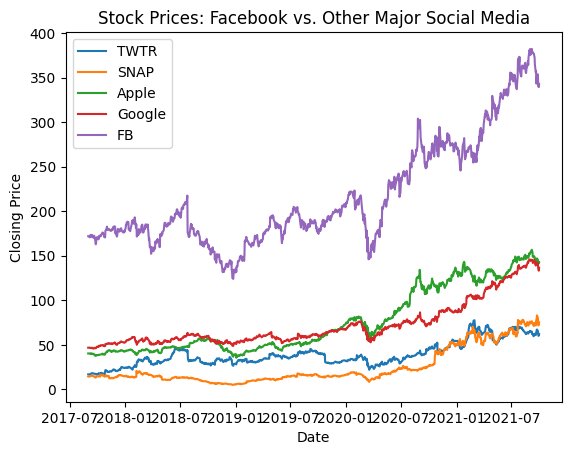

In [8]:
# Closing prices of Facebook vs Other Companies (2012-2022)
copanies = ['TWTR', 'SNAP', 'Apple', 'Google']
for company in copanies:
    plt.plot(FB_dataframe['Date'], FB_dataframe[company + ' Close'], label=company)
plt.plot(FB_dataframe['Date'], FB_dataframe['Close'], label='FB')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Prices: Facebook vs. Other Major Social Media')
plt.legend()
plt.show()

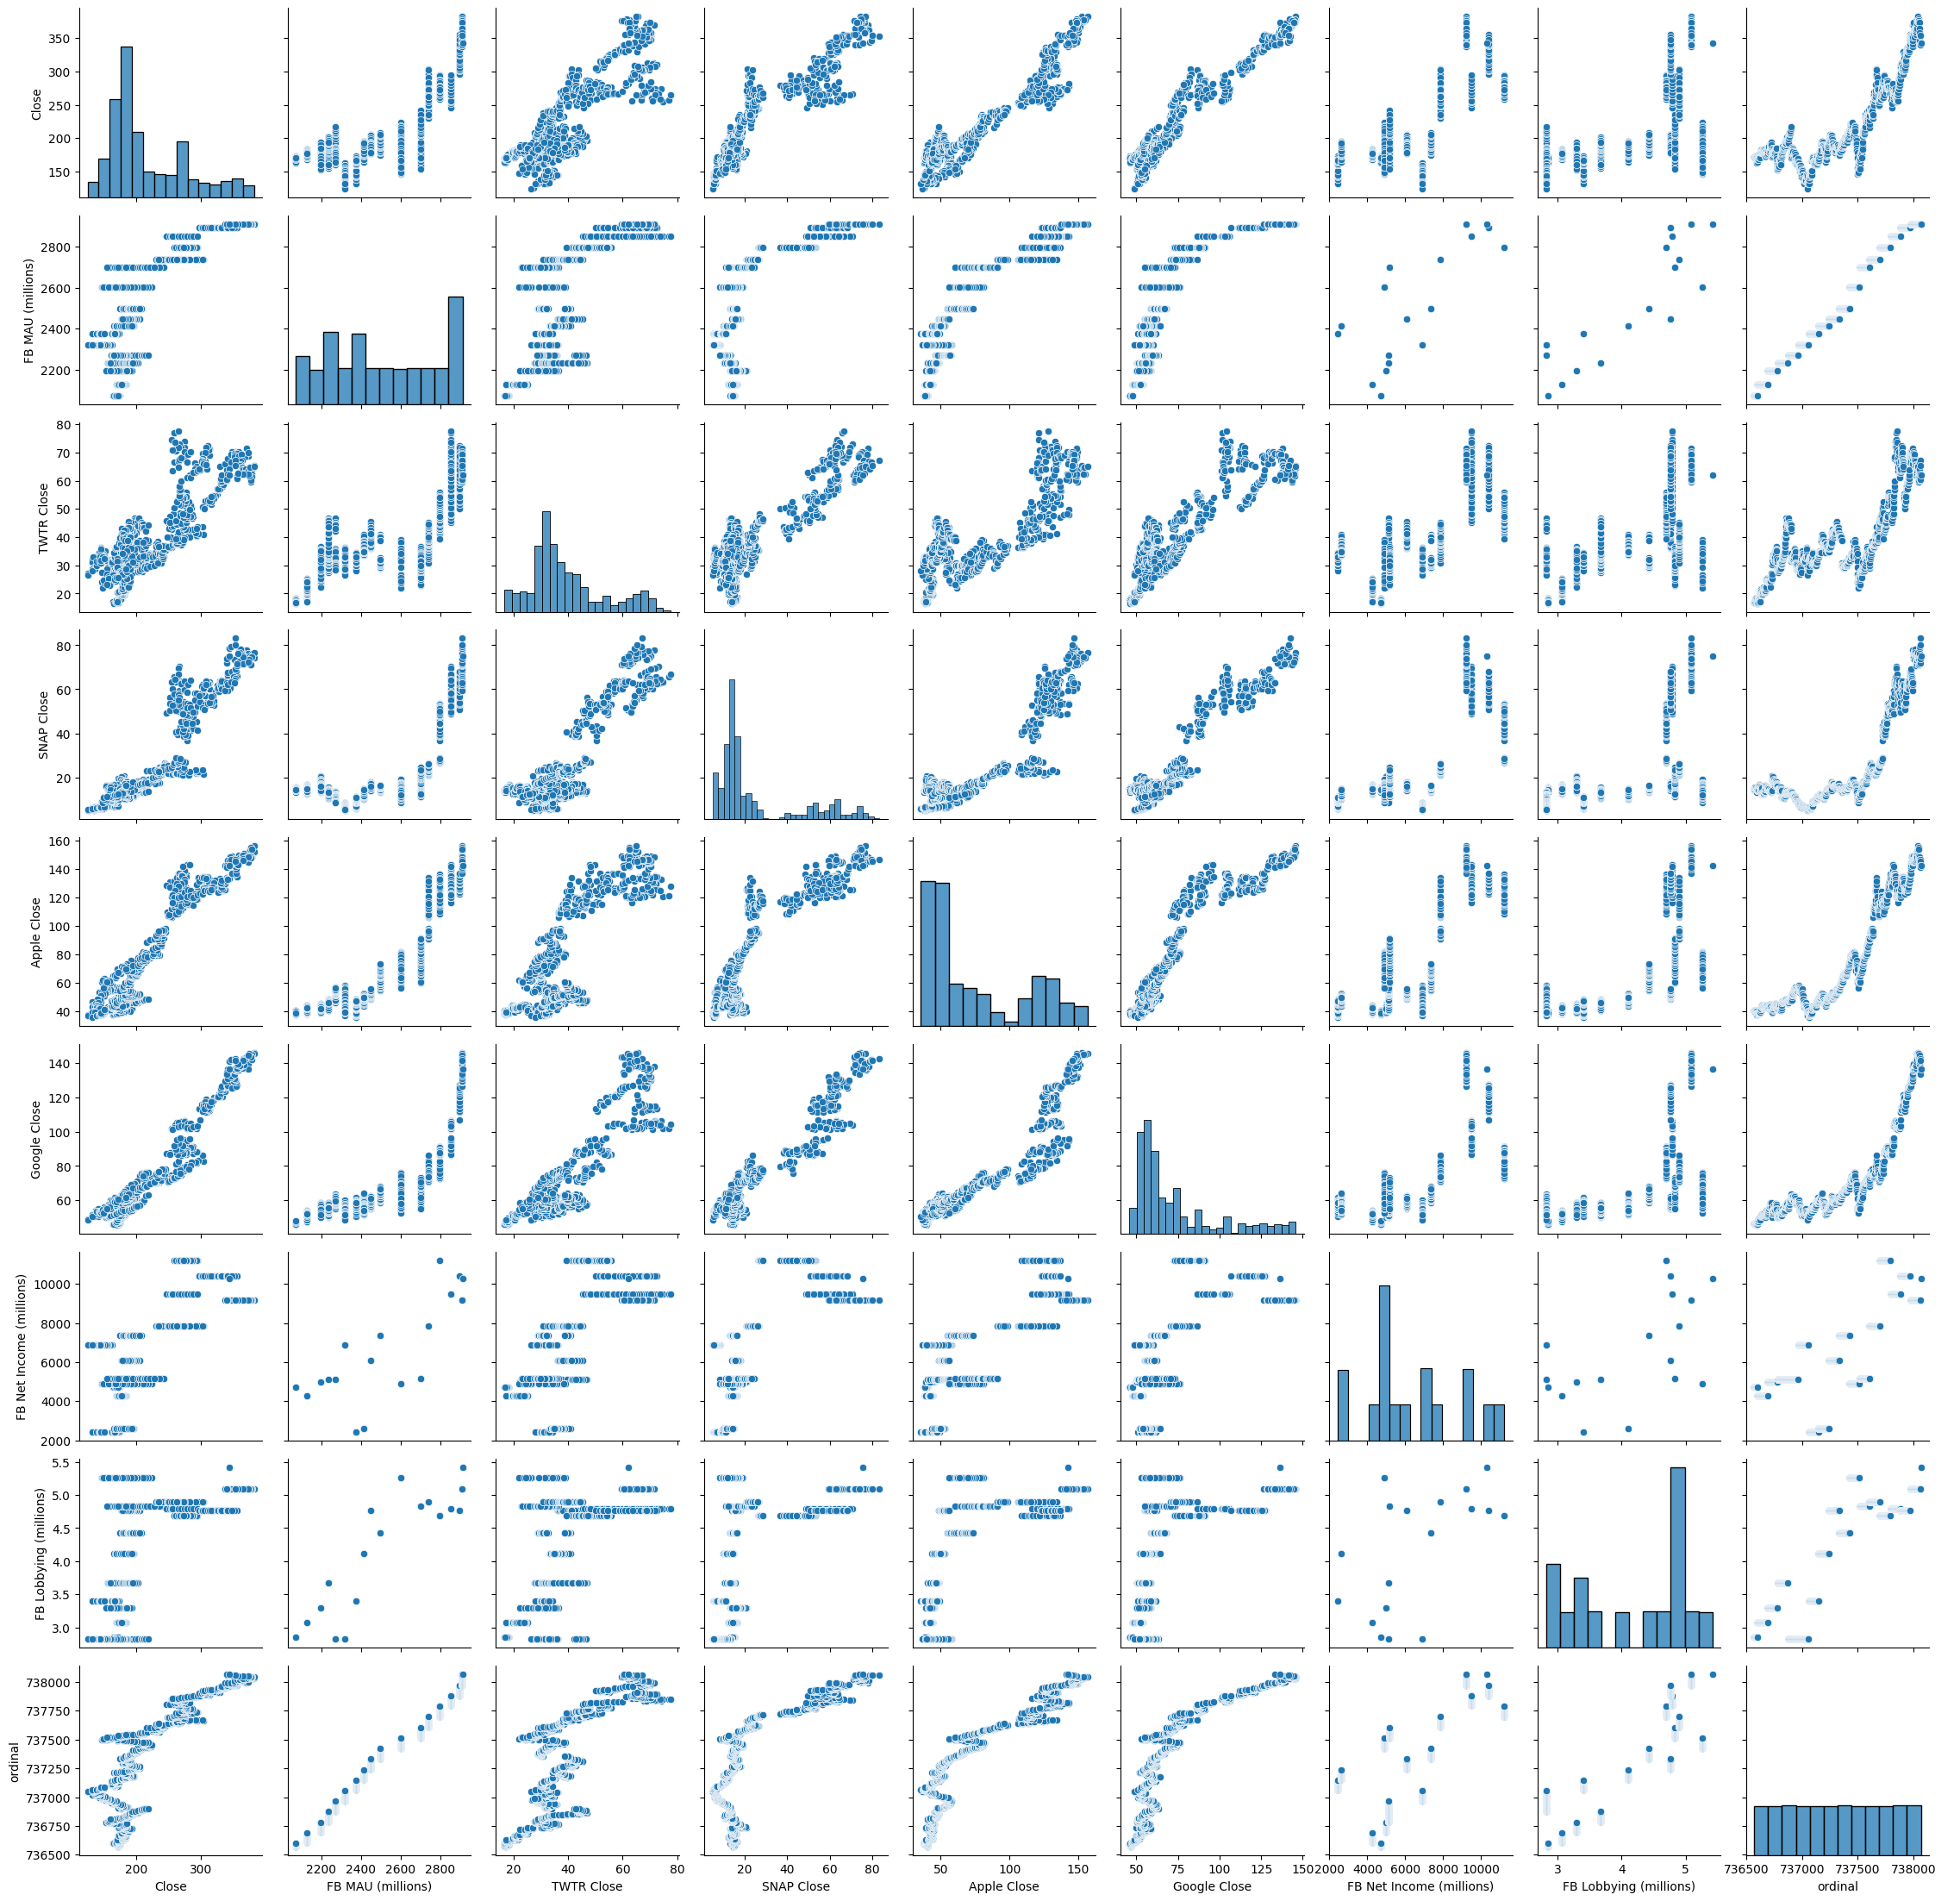

In [9]:
i = sns.PairGrid(FB_dataframe)
i.map_diag(sns.histplot)
i.map_offdiag(sns.scatterplot)
i.add_legend()

### Train Model and Predict

Simple Linear Regression (FB Closing Price vs. Datetime)
(https://www.w3schools.com/python/python_ml_multiple_regression.asp)

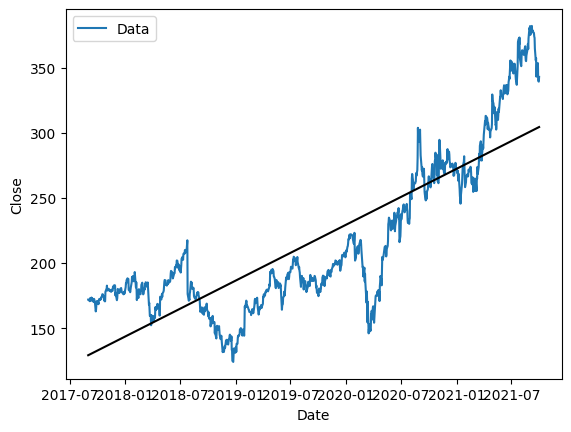

Mean squared error:  1150.1949047226065
Root Mean squared error:  33.91452350723221


In [10]:
# Split and Train Data
X = FB_dataframe[['ordinal']]
y = FB_dataframe['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = linear_model.LinearRegression()
regr.fit(X_train.values, y_train.values)

# plot data
original_x = np.array([date.fromordinal(ordinal) for ordinal in X['ordinal'].values.flatten()])
sort_index = np.argsort(X['ordinal'])
original_x = original_x[sort_index]
original_y = y.values[sort_index]

fig, ax = plt.subplots()
ax.plot(original_x, original_y, label='Data')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.legend()

# plot pred
date_range = pd.date_range(start='2017-08-31', end='2021-10-01', freq='D')
ordinal_range = date_range.to_series().apply(lambda date: date.toordinal())
y_pred = regr.predict(ordinal_range.to_numpy().reshape(-1, 1))
ax.plot(date_range, y_pred, color='k')

plt.show()

# Evaluate the performance of the model using mean squared error
y_pred_test = regr.predict(X_test.values)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('Mean squared error: ', mse)
print('Root Mean squared error: ', rmse)

Support Vector Regression (FB Closing Price vs. Datetime, Income)

In [22]:
def SVR_predict_plot(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model using the training data
    svr.fit(X_train.values, y_train.values)
    
    # Convert date time
    X_date = X_test['ordinal']
    y_pred_test = svr.predict(X_test.values)
    datetime_array = np.array([date.fromordinal(ordinal) for ordinal in X_date.values.flatten()])

    # Evaluate the performance of the model using mean squared error
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    print('Mean squared error: ', mse)
    print('Root Mean squared error: ', rmse)

    # sort data by date
    sort_index = np.argsort(X_test['ordinal'])
    datetime_array = datetime_array[sort_index]
    y_pred_test = y_pred_test[sort_index]

    original_x = np.array([date.fromordinal(ordinal) for ordinal in X['ordinal'].values.flatten()])
    sort_index = np.argsort(X['ordinal'])
    original_x = original_x[sort_index]
    original_y = y.values[sort_index]
    
    # set the x-axis locator and formatter
    fig, ax = plt.subplots()
    years = mdates.YearLocator()   # set the locator to years
    date_fmt = mdates.DateFormatter('%Y')  # set the date format to show only year
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(date_fmt)

    # Plot Original
    ax.plot(original_x, original_y, label='Actual')
    ax.plot(datetime_array, y_pred_test, label='Prediction')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()
    plt.show()

Mean squared error:  14.63988516656547
Root Mean squared error:  3.8262102878129256


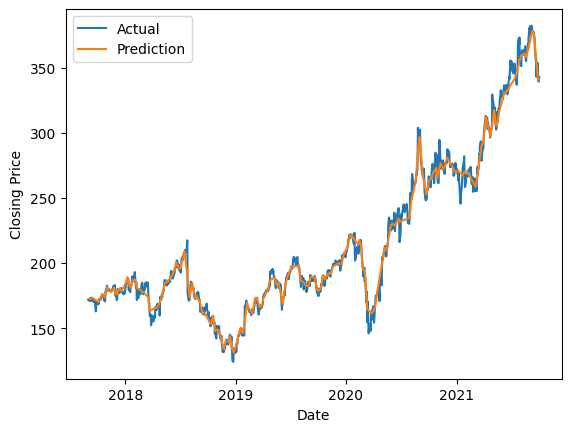

In [23]:
# Support Vector Machines (DateTime vs Closing Price)
X = FB_dataframe[['ordinal']]
y = FB_dataframe['Close']
# Create SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.01)
# Predict and Plot
SVR_predict_plot(X, y)

Mean squared error:  17.725751830814254
Root Mean squared error:  4.210196174861007


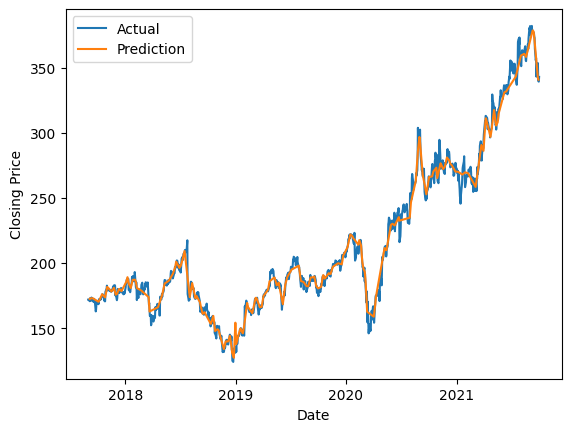

In [24]:
# Support Vector Machines (DateTime, Net Income vs Closing Price)
X = FB_dataframe[['ordinal', 'FB MAU (millions)']]
y = FB_dataframe['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.01)
# Predict and Plot
SVR_predict_plot(X, y)

Mean squared error:  13.034410121718784
Root Mean squared error:  3.6103199472787426


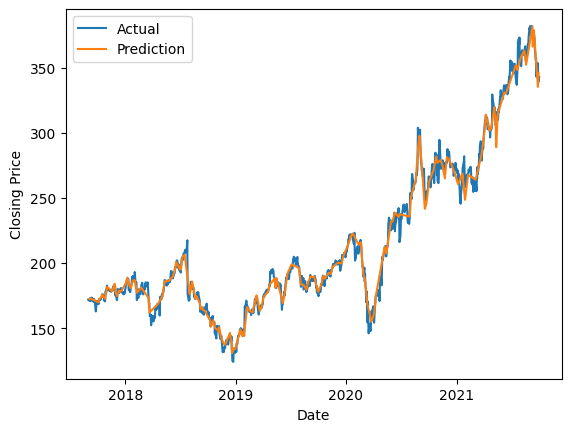

In [26]:
# Support Vector Machines (DateTime, Net Income vs Closing Price)
X = FB_dataframe[['ordinal', 'Apple Close', 'Google Close']]
y = FB_dataframe['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.01)
# Predict and Plot
SVR_predict_plot(X, y)

### Evaluate Accuracy